In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
sns.set()
% matplotlib inline

### 1. Load the Data
       The dataset chosen for our study is the simple and well known example of Iris flowers features available here
   https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
       
       The dataset is availbe as comma seperated value (.csv) format and is loaded as a pandas dataframe.

In [2]:
# import the dataset
DF = pd.read_csv('iris.csv')
DF.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
DF.shape

(150, 4)

### 2. Subtract the Mean
        For PCA to work properly, you have to subtract the mean from each of the data dimen-sions. The mean subtracted is the average across each dimension. So, all the values have (the mean of the values of all the data points) subtracted, and all the values have subtracted from them. This produces a data set whose mean is zero.

In [4]:
# compute the mean
DF.mean()

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

In [5]:
# subtract the mean from the data
DF = DF - DF.mean()
DF.head()

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [6]:
DF.mean()

sepal length   -1.125026e-15
sepal width    -6.750156e-16
petal length   -3.238891e-15
petal width    -6.069219e-16
dtype: float64

### 3. Calculate the covariance Matrix
        Covariance is measured between two dimensions (or features) of the dataset. Since there are 4 features, we get a covariance matrix of size 4 x 4

In [7]:
# calculate the covariance matrix
cov_mat = np.cov([DF.iloc[:, 0], DF.iloc[:, 1], DF.iloc[:, 2], DF.iloc[:, 3]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


### 4. Calculate the eigenvectors and eigenvalues of the covariance matrix
        Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. These are rather important, as they tell us useful information about our data.

In [8]:
# calcuate Eigenvalues and Eigenvectors from covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [9]:
eig_val

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [10]:
eig_vec

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [11]:
# Make combination of eigenvalues and vectors
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the combination in descending value of eigenvalues
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [12]:
eig_pairs

[(4.224840768320108,
  array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])),
 (0.24224357162751506,
  array([-0.65653988, -0.72971237,  0.1757674 ,  0.07470647])),
 (0.07852390809415427,
  array([-0.58099728,  0.59641809,  0.07252408,  0.54906091])),
 (0.02368302712600025,
  array([ 0.31725455, -0.32409435, -0.47971899,  0.75112056]))]

### 4.1 Choosing 2 Eigenvectors as Principle components
        In total there are 4 pairs of eigenvalues and vectors, among which we are only choosing the top two paris with largest eigenvalues. This resutls in reducion of dimension of the data from 4 dimensions to 2 dimensions. 

In [13]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))).T
print('Eigenvector matrix W:\n', matrix_w)

Eigenvector matrix W:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]


### 5. Deriving the new Dataset
        This the final step in PCA, and is also the easiest. Once we have chosen the components (eigenvectors) that we wish to keep in our data and formed a feature vector, we simply multiply it to the original data set.

In [14]:
new_data = matrix_w.dot(DF.values.T).T

In [15]:
new_data.shape

(150, 2)

Text(0,0.5,'PC2')

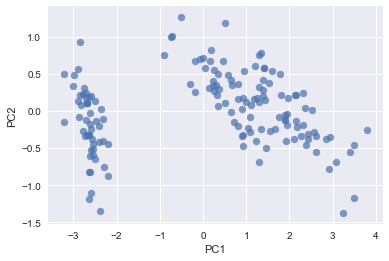

In [16]:
mp.scatter(new_data[:, 0], new_data[:, 1], alpha=0.7)
mp.xlabel('PC1')
mp.ylabel('PC2')